# Inhaltsverzeichnis

| Abschnitt | Unterabschnitt |
|-----------|----------------|
| **[Zusammenfassung](#zusammenfassung)** | |
| **[für die täglichen Daten ist es ARIMA(3,1,5)(0,0,0)[0]](#fuer-die-taeglichen-daten-ist-es-arima(3,1,5)(0,0,0)[0])** | |
| **[Tägliche ARIMA (3,0,5) Residuen-Stationaritätsstatistiken-Tests](#daily-arima--(3,0,5)-residual-stationarity-statistic-tests)** | |
| **[Vorhergesagte vs. Testdaten](#vorhergesagte-vs.-testdaten)** | |
| **[Cross validation](#cross-validation)** | |


# Beste ARIMA Modell

# Automatische Modellauswahl mit `auto_arima` in Python

Die Funktion `auto_arima` aus der Bibliothek `pmdarima` ermöglicht eine automatisierte und effiziente Auswahl des besten ARIMA-Modells für Zeitreihenanalysen. Hier sind die Vorteile und eine detaillierte Beschreibung der verwendeten Parameter:


### Wichtige Parameter von `auto_arima`:

- **`seasonal`**: Gibt an, ob saisonale Unterschiede in den Daten berücksichtigt werden sollen (`True`) oder nicht (`False`).
- **`trace`**: Wenn auf `True` gesetzt, zeigt es die Ausgabe während der Modellsuche an, was hilft, den Fortschritt zu verfolgen.
- **`error_action`**: Legt fest, was passieren soll, wenn ein Fehler bei der Modellanpassung auftritt. 'ignore' bedeutet, dass der Fehler ignoriert und mit der Suche fortgefahren wird.
- **`suppress_warnings`**: Unterdrückt Konvergenzwarnungen, was nützlich ist, wenn viele Modelle getestet werden.
- **`stepwise`**: Aktiviert oder deaktiviert die schrittweise Suche, die schneller ist, indem sie frühere Schritte zur Vorhersage der besten neuen Parameter nutzt.
- **`information_criterio

In [5]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
import joblib  # Import joblib

# Load the daily data
daily_file_path = './Data_Waldbrand_Zeitreihen/daily_fire_counts.csv'
daily_data = pd.read_csv(daily_file_path)

# Rename columns for clarity and parse dates
daily_data.rename(columns={"DISCOVERY_DATE": "Date", "Daily Fire Counts": "Fire_Count"}, inplace=True)
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.set_index('Date', inplace=True)

# Apply log transformation to the daily fire counts
daily_data['Log_Fire_Count'] = np.log1p(daily_data['Fire_Count'])  

# Fit the ARIMA model using auto_arima
model = auto_arima(daily_data['Log_Fire_Count'], seasonal=False, trace=True,
                   error_action='ignore', suppress_warnings=True,
                   stepwise=True, information_criterion='aic')

# Print the summary of the model
print(model.summary())

# Save the ARIMA model to a file
model_file_path = './Data_Waldbrand_Zeitreihen/Model_Results/Best_ARIMA_daily_model.pkl'
joblib.dump(model, model_file_path)
print(f"Model saved at: {model_file_path}")

# Extract fitted values and residuals
fitted_values = model.arima_res_.fittedvalues  # Fitted values from the model
fitted_residuals = model.arima_res_.resid  # Residuals from the model

# Align the fitted values and residuals with the original index
fitted_values = pd.Series(fitted_values, index=daily_data.index[-len(fitted_values):])
fitted_residuals = pd.Series(fitted_residuals, index=daily_data.index[-len(fitted_residuals):])

# Save the fitted values to a CSV file
fitted_values_file_path = './Data_Waldbrand_Zeitreihen/daily_data_merged/Best_ARIMA_daily_fitted_values.csv'
fitted_values.to_frame(name='Fitted_Values').to_csv(fitted_values_file_path, index=True)
print(f"Fitted values saved at: {fitted_values_file_path}")

# Save the residuals to a CSV file
residuals_file_path = './Data_Waldbrand_Zeitreihen/daily_data_merged/Best_ARIMA_daily_fitted_residuals.csv'
fitted_residuals.to_frame(name='Residuals').to_csv(residuals_file_path, index=True)
print(f"Residuals saved at: {residuals_file_path}")

# Print the fitted values and residuals
print("Fitted Values:\n", fitted_values)
print("Residuals:\n", fitted_residuals)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7005.412, Time=4.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7886.550, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7887.774, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7887.383, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7884.553, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6998.154, Time=2.88 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7518.800, Time=0.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7163.950, Time=1.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6999.283, Time=3.37 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=7209.801, Time=1.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6999.599, Time=2.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6999.515, Time=4.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=6996.169, Time=0.81 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=7516.804, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0]          

## Zusammenfassung

In [3]:
import joblib  # For loading the saved ARIMA model
import matplotlib.pyplot as plt
from pathlib import Path

# Path to the saved ARIMA model
model_file_path = './Data_Waldbrand_Zeitreihen/Model_Results/Best_ARIMA_daily_model.pkl'
output_image_path = './Abbildungen/ARIMA_daily_Summary.png'

# Load the ARIMA model
loaded_model = joblib.load(model_file_path)

# Print the summary of the loaded ARIMA model
model_summary = loaded_model.summary()
print(loaded_model.summary())


# Save the summary as a PNG image
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
ax.text(0.5, 0.5, str(model_summary), fontsize=10, va='center', ha='center', wrap=True)
plt.tight_layout()


# Save the image
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')
plt.close()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8766
Model:               SARIMAX(3, 1, 5)   Log Likelihood               -3470.667
Date:                Tue, 28 Jan 2025   AIC                           6959.335
Time:                        10:02:20   BIC                           7023.041
Sample:                    01-01-1992   HQIC                          6981.041
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1113      0.025    -44.367      0.000      -1.160      -1.062
ar.L2          0.1937      0.035      5.519      0.000       0.125       0.262
ar.L3          0.6304      0.020     31.320      0.0

# Stationaritätstest für das ausgewählte Modell (Niedrigster AIC)

## für die täglichen Daten ist es ARIMA(3,1,5)(0,0,0)[0]


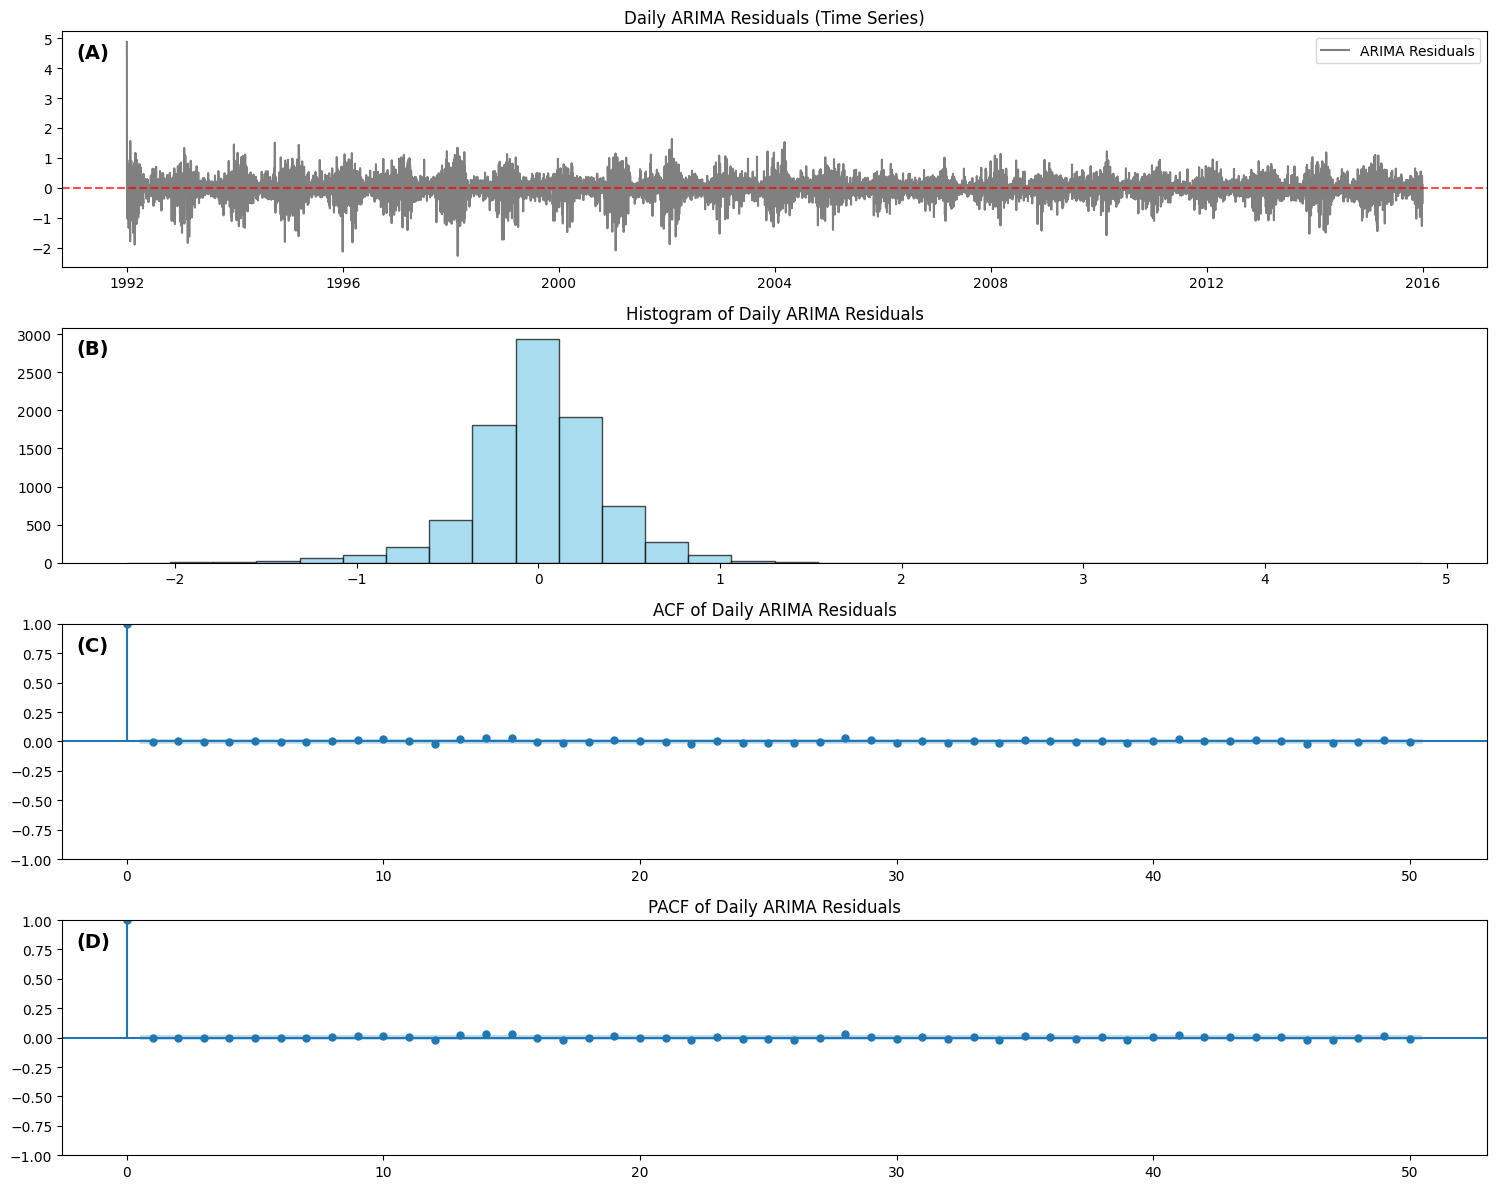

Daily ARIMA residual analysis plot saved at: ./Abbildungen/daily_arima_residual_analysis.png
Daily ARIMA residuals saved at: ./Data_Waldbrand_Zeitreihen/daily_data_merged/daily_arima_residuals.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

# Load the residuals data from the CSV file
arima_residuals = pd.read_csv('./Data_Waldbrand_Zeitreihen/daily_data_merged/Best_ARIMA_daily_fitted_residuals.csv', index_col='Date', parse_dates=True)

# Residual Analysis for Daily Data
plt.figure(figsize=(15, 12))

# Residual time series
plt.subplot(411)
plt.plot(arima_residuals['Residuals'], label='ARIMA Residuals', color='gray')
plt.axhline(0, linestyle='--', color='red', alpha=0.7)
plt.text(0.01, 0.95, '(A)', transform=plt.gca().transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
plt.title('Daily ARIMA Residuals (Time Series)')
plt.legend()

# Histogram of residuals
plt.subplot(412)
plt.hist(arima_residuals['Residuals'].values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.text(0.01, 0.95, '(B)', transform=plt.gca().transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
plt.title('Histogram of Daily ARIMA Residuals')

# ACF plot of residuals
plt.subplot(413)
plot_acf(arima_residuals['Residuals'].dropna(), lags=50, ax=plt.gca(), title='ACF of Daily ARIMA Residuals')
plt.text(0.01, 0.95, '(C)', transform=plt.gca().transAxes, fontsize=14, fontweight='bold', va='top', ha='left')

# PACF plot of residuals
plt.subplot(414)
plot_pacf(arima_residuals['Residuals'].dropna(), lags=50, ax=plt.gca(), title='PACF of Daily ARIMA Residuals')
plt.text(0.01, 0.95, '(D)', transform=plt.gca().transAxes, fontsize=14, fontweight='bold', va='top', ha='left')

# Save the plot to the 'Abbildungen' folder
daily_residuals_output_path = r"./Abbildungen/daily_arima_residual_analysis.png"
plt.tight_layout()
plt.savefig(daily_residuals_output_path, dpi=300)
plt.show()

print(f"Daily ARIMA residual analysis plot saved at: {daily_residuals_output_path}")

# Save the daily ARIMA residuals to a CSV file
daily_residuals_output_csv_path = r"./Data_Waldbrand_Zeitreihen/daily_data_merged/daily_arima_residuals.csv"
arima_residuals.to_csv(daily_residuals_output_csv_path, header=True)
print(f"Daily ARIMA residuals saved at: {daily_residuals_output_csv_path}")


## Tägliche ARIMA (3,0,5) Residuen-Stationaritätsstatistiken-Tests


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import kpss, adfuller

# Suppress warnings in the output
import warnings
warnings.filterwarnings("ignore")


# Load the residuals data from the previously created CSV file
daily_residuals_output_csv_path = r"./Data_Waldbrand_Zeitreihen/daily_data_merged/daily_arima_residuals.csv"
arima_residuals = pd.read_csv(daily_residuals_output_csv_path, index_col='Date', parse_dates=True)

# Extract the residuals
residuals = arima_residuals['Residuals']

# Perform the Augmented Dickey-Fuller test on the residuals
adf_test = adfuller(residuals.dropna())

# Output the results for ADF test
print('ADF Statistic (Residuals): %f' % adf_test[0])
print('p-value (Residuals): %f' % adf_test[1])
print('Critical Values (Residuals):')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Determine stationarity based on ADF test
if adf_test[1] < 0.05:
    print("The residuals are stationary according to the ADF test.")
else:
    print("The residuals are not stationary according to the ADF test.")

# Perform the KPSS test on the residuals
kpss_test = kpss(residuals.dropna(), regression='c')  # 'c' for constant in the regression

# Output the results for KPSS test
print('KPSS Statistic (Residuals): %f' % kpss_test[0])
print('p-value (Residuals): %f' % kpss_test[1])
print('Critical Values (Residuals):')
for key, value in kpss_test[3].items():
    print('\t%s: %.3f' % (key, value))

# Determine stationarity based on KPSS test
if kpss_test[1] < 0.05:
    print("The residuals are not stationary according to the KPSS test.")
else:
    print("The residuals are stationary according to the KPSS test.")


ADF Statistic (Residuals): -94.725321
p-value (Residuals): 0.000000
Critical Values (Residuals):
	1%: -3.431
	5%: -2.862
	10%: -2.567
The residuals are stationary according to the ADF test.
KPSS Statistic (Residuals): 0.045010
p-value (Residuals): 0.100000
Critical Values (Residuals):
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
The residuals are stationary according to the KPSS test.


##  Vorhergesagte vs. Testdaten

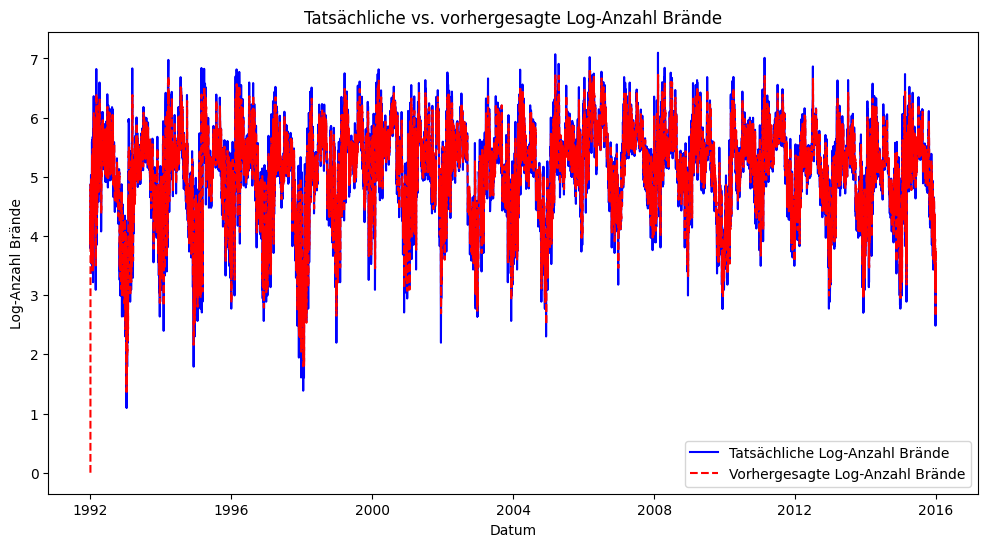

In [3]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

# Das gespeicherte ARIMA-Modell laden
modell_pfad = './Data_Waldbrand_Zeitreihen/Model_Results/Best_ARIMA_daily_model.pkl'
modell = joblib.load(modell_pfad)

# Die täglichen Daten laden
daten_pfad = './Data_Waldbrand_Zeitreihen/daily_fire_counts.csv'
daten = pd.read_csv(daten_pfad)

# Spalten umbenennen für Klarheit und Datumsangaben parsen
daten.rename(columns={"DISCOVERY_DATE": "Datum", "Daily Fire Counts": "Anzahl_Brände"}, inplace=True)
daten['Datum'] = pd.to_datetime(daten['Datum'])
daten.set_index('Datum', inplace=True)

# Log-Transformation auf die täglichen Brandanzahlen anwenden
daten['Log_Anzahl_Brände'] = np.log1p(daten['Anzahl_Brände'])

# In-Sample-Vorhersagen generieren
angepasste_werte = modell.predict_in_sample()

# Ein DataFrame für die angepassten Werte erstellen
angepasste_df = pd.DataFrame({
    'Datum': daten.index[-len(angepasste_werte):],
    'Angepasste_Log_Anzahl_Brände': angepasste_werte
})
angepasste_df.set_index('Datum', inplace=True)

# Tatsächliche und angepasste Werte zusammenführen
vergleich_df = daten[['Log_Anzahl_Brände']].merge(angepasste_df, left_index=True, right_index=True)

# Tatsächliche vs. vorhergesagte Werte plotten
plt.figure(figsize=(12, 6))
plt.plot(vergleich_df.index, vergleich_df['Log_Anzahl_Brände'], label='Tatsächliche Log-Anzahl Brände', color='blue')
plt.plot(vergleich_df.index, vergleich_df['Angepasste_Log_Anzahl_Brände'], label='Vorhergesagte Log-Anzahl Brände', color='red', linestyle='--')
plt.xlabel('Datum')
plt.ylabel('Log-Anzahl Brände')
plt.title('Tatsächliche vs. vorhergesagte Log-Anzahl Brände')
plt.legend()
plt.show()


## Cross validation

In [8]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
import matplotlib.pyplot as plt

# Path to the saved model
model_path = 'Data_Waldbrand_Zeitreihen/Model_Results/Best_ARIMA_daily_model.pkl'

# Load the model
model = joblib.load(model_path)

# Load the daily data
daily_file_path = './Data_Waldbrand_Zeitreihen/daily_fire_counts.csv'
daily_data = pd.read_csv(daily_file_path)

# Rename columns for clarity and parse dates
daily_data.rename(columns={"DISCOVERY_DATE": "Date", "Daily Fire Counts": "Fire_Count"}, inplace=True)
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.set_index('Date', inplace=True)

# Apply log transformation to the daily fire counts (as was done during training)
daily_data['Log_Fire_Count'] = np.log1p(daily_data['Fire_Count'])

# Prepare for cross-validation
data = daily_data['Log_Fire_Count']
n_splits = 5
fold_size = int(len(data) / n_splits)

mse_scores, mae_scores, rmse_scores = [], [], []
for i in range(n_splits - 1):
    train_end = (i + 1) * fold_size
    test_end = (i + 2) * fold_size

    train_data = data[:train_end]
    test_data = data[train_end:test_end]

    # Predict using the model; handle exogenous variables or other specifics as required
    predictions = model.predict(n_periods=len(test_data), exogenous=None)  # adjust accordingly

    # Calculate different error metrics
    mse = mean_squared_error(test_data, predictions)
    mae = mean_absolute_error(test_data, predictions)
    rmse = np.sqrt(mse)

    # Store the scores for final averaging
    mse_scores.append(round(mse, 4))
    mae_scores.append(round(mae, 4))
    rmse_scores.append(round(rmse, 4))

    # Print fold-specific scores
    print(f"Fold {i + 1} MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Average scores across all folds
average_scores = {
    'Metric': ['MSE', 'MAE', 'RMSE'],
    'Average Value': [
        round(np.mean(mse_scores), 4),
        round(np.mean(mae_scores), 4),
        round(np.mean(rmse_scores), 4)
    ]
}

# Create a DataFrame for the averaged values
averaged_scores_df = pd.DataFrame(average_scores)

# Define the path to save the table as an image
output_dir = "./Abbildungen"
os.makedirs(output_dir, exist_ok=True)
output_image_path = os.path.join(output_dir, "arima_daily_averaged_scores_table.png")

# Save the table as a LaTeX-like styled image
fig, ax = plt.subplots(figsize=(5, 1.5))  # Reduced figure size to minimize margins
ax.axis('tight')
ax.axis('off')

# Create a better-presented table with LaTeX styling
cell_text = [[f"{val}" for val in row] for row in averaged_scores_df.values]
col_labels = averaged_scores_df.columns
ax.table(cellText=cell_text, colLabels=col_labels, loc='center', cellLoc='center', edges='horizontal')

plt.savefig(output_image_path, dpi=300, bbox_inches='tight', pad_inches=0)
plt.close()

print(f"Averaged scores table saved as an image at: {output_image_path}")

# Print average scores
print("Average MSE:", round(np.mean(mse_scores), 4))
print("Average MAE:", round(np.mean(mae_scores), 4))
print("Average RMSE:", round(np.mean(rmse_scores), 4))


Fold 1 MSE: 2.9865, MAE: 1.5792, RMSE: 1.7281
Fold 2 MSE: 3.0493, MAE: 1.5941, RMSE: 1.7462
Fold 3 MSE: 3.2479, MAE: 1.6762, RMSE: 1.8022
Fold 4 MSE: 2.7600, MAE: 1.5349, RMSE: 1.6613
Averaged scores table saved as an image at: ./Abbildungen\arima_daily_averaged_scores_table.png
Average MSE: 3.0109
Average MAE: 1.5961
Average RMSE: 1.7344
